In [92]:
import example_from_book.thinkdsp as tk
import numpy as np

## Упражнение 2.2

In [93]:
class SawtoothSignal(tk.Signal):
    def __init__(self, freq=440, amp=1.0, offset=0):
        self.freq = freq
        self.amp = amp
        self.offset = offset

    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / (np.pi * 2)
        frac, _ = np.modf(cycles)
        ys = tk.normalize(tk.unbias(frac), self.amp)
        return ys

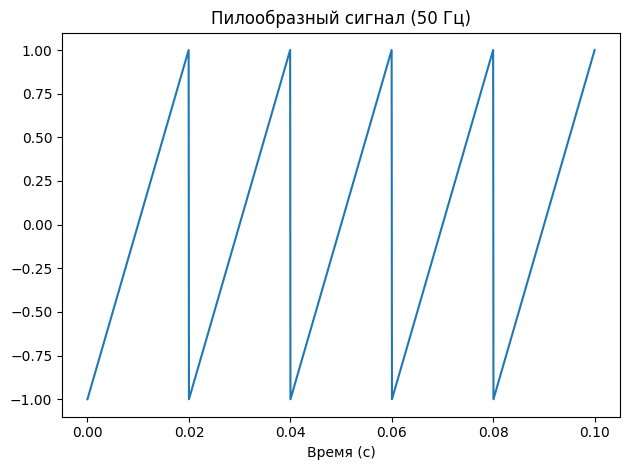

In [94]:
signal = SawtoothSignal(freq=50)

wave = signal.make_wave(duration=signal.period, framerate=16_000)

wave.plot()
tk.decorate(
    title="Пилообразный сигнал (50 Гц)",
    xlabel="Время (с)"
)

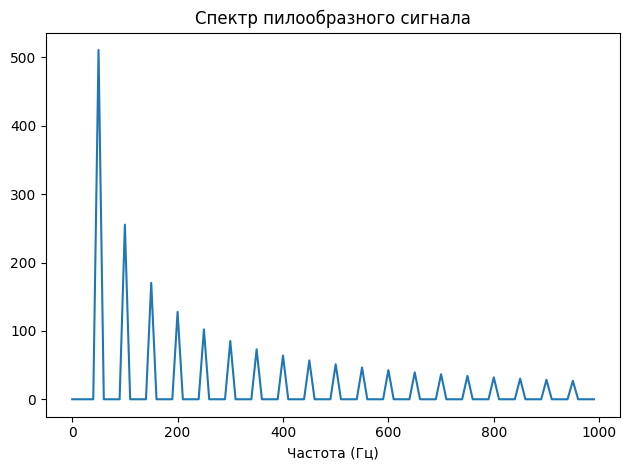

In [95]:
spec = wave.make_spectrum()

spec.plot(high=1000)
tk.decorate(
    title="Спектр пилообразного сигнала",
    xlabel="Частота (Гц)"
)

## Упражнение 2.3

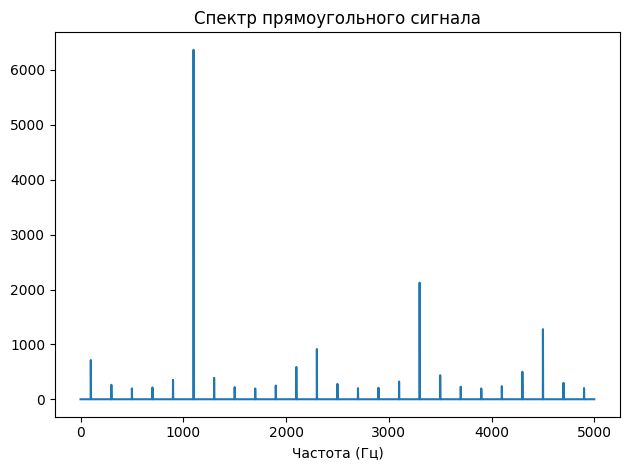

In [96]:
signal = tk.SquareSignal(freq=1100)
wave = signal.make_wave(duration=1, framerate=10_000)
spec = wave.make_spectrum()

spec.plot()
tk.decorate(
    title="Спектр прямоугольного сигнала",
    xlabel="Частота (Гц)"
)

In [97]:
wave.make_audio()

## Упражнение 2.4

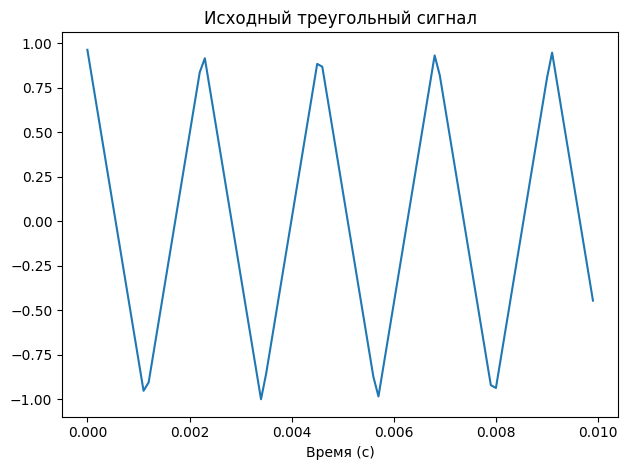

In [98]:
signal = tk.TriangleSignal(freq=440)
wave = signal.make_wave(duration=0.01, framerate=10_000)

wave.plot()
tk.decorate(
    title="Исходный треугольный сигнал",
    xlabel="Время (с)"
)

In [99]:
spec = wave.make_spectrum()

print(f"fs[0]={spec.fs[0]}")
print(f"hs[0]={spec.hs[0]}")

fs[0]=0.0
hs[0]=(3.375077994860476e-14+0j)


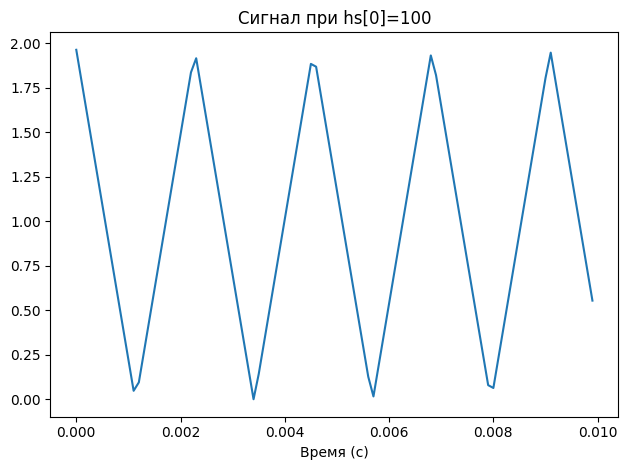

In [100]:
spec.hs[0] = 100
new_wave = spec.make_wave()

new_wave.plot()
tk.decorate(
    title="Сигнал при hs[0]=100",
    xlabel="Время (с)"
)

## Упражнение 2.5

In [101]:
def divide_by_freq(spectrum):
    _spec = spectrum.copy()
    fs = _spec.fs.copy()
    fs[0] = 1.0
    _spec.hs /= fs
    _spec.hs[0] = 0
    return _spec

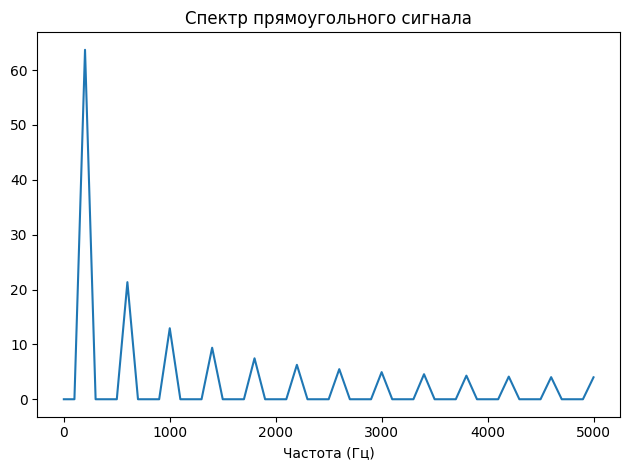

In [102]:
signal = tk.SquareSignal(freq=200)
wave = signal.make_wave(duration=0.01, framerate=10_000)
spec = wave.make_spectrum()

spec.plot()
tk.decorate(
    title="Спектр прямоугольного сигнала",
    xlabel="Частота (Гц)"
)

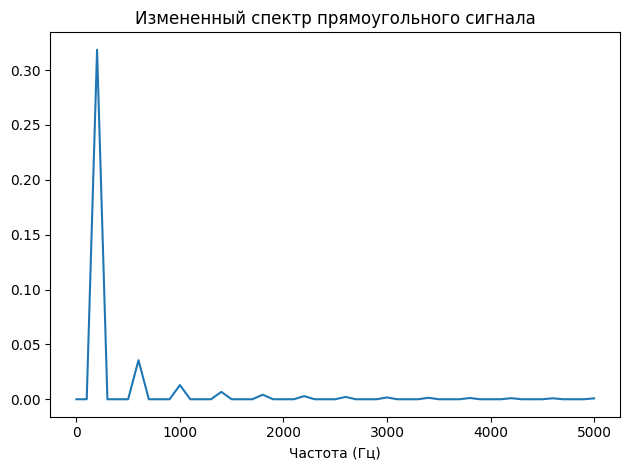

In [103]:
spec2 = divide_by_freq(spec)

spec2.plot()
tk.decorate(
    title="Измененный спектр прямоугольного сигнала",
    xlabel="Частота (Гц)"
)

In [104]:
wave2 = spec2.make_wave()
wave2.make_audio()

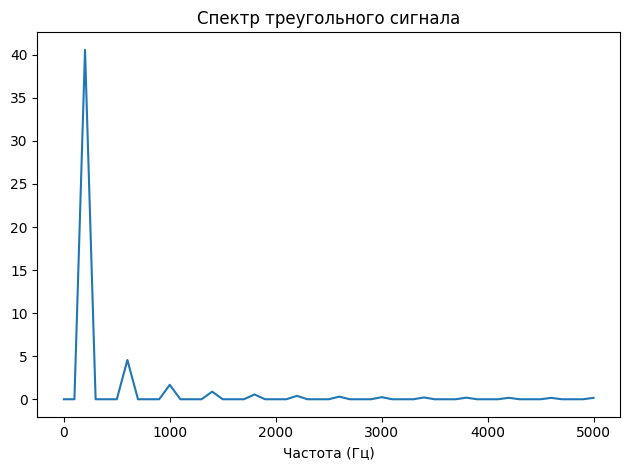

In [105]:
signal = tk.TriangleSignal(freq=200)
wave = signal.make_wave(duration=0.01, framerate=10_000)
spec = wave.make_spectrum()

spec.plot()
tk.decorate(
    title="Спектр треугольного сигнала",
    xlabel="Частота (Гц)"
)

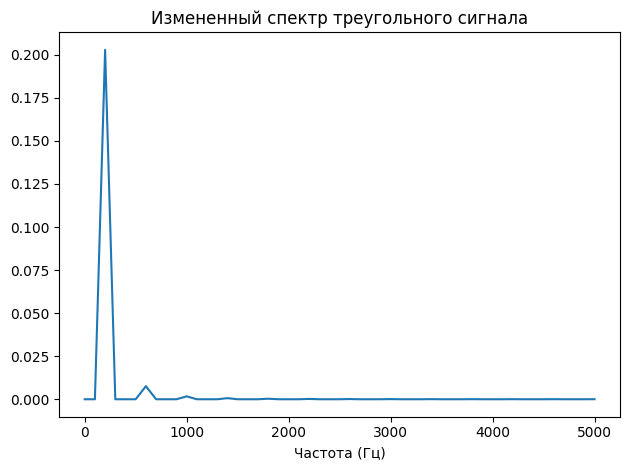

In [106]:
spec2 = divide_by_freq(spec)

spec2.plot()
tk.decorate(
    title="Измененный спектр треугольного сигнала",
    xlabel="Частота (Гц)"
)

In [107]:
wave2 = spec2.make_wave()
wave2.make_audio()

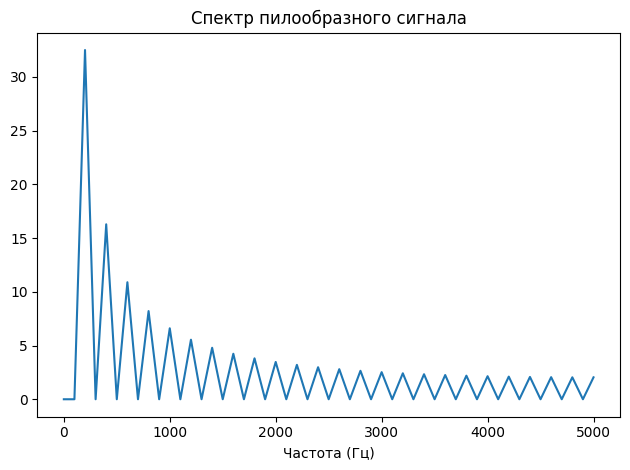

In [108]:
signal = SawtoothSignal(freq=200)
wave = signal.make_wave(duration=0.01, framerate=10_000)
spec = wave.make_spectrum()

spec.plot()
tk.decorate(
    title="Спектр пилообразного сигнала",
    xlabel="Частота (Гц)"
)

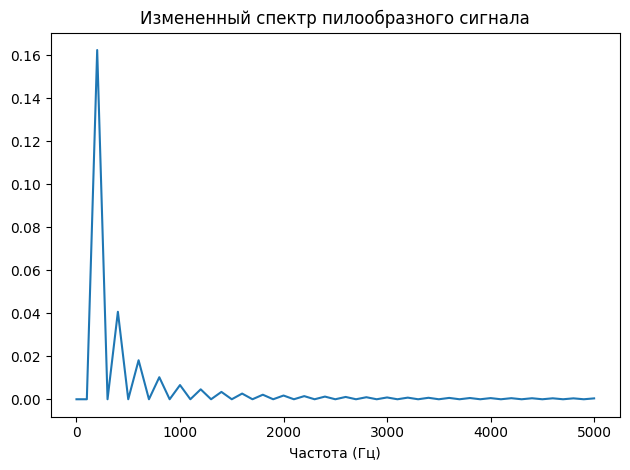

In [109]:
spec2 = divide_by_freq(spec)

spec2.plot()
tk.decorate(
    title="Измененный спектр пилообразного сигнала",
    xlabel="Частота (Гц)"
)

In [110]:
wave2 = spec2.make_wave()
wave2.make_audio()

## Упражнение 2.6

In [111]:
signal = SawtoothSignal(200)
wave = signal.make_wave(duration=0.5, framerate=10_000)
wave.make_audio()

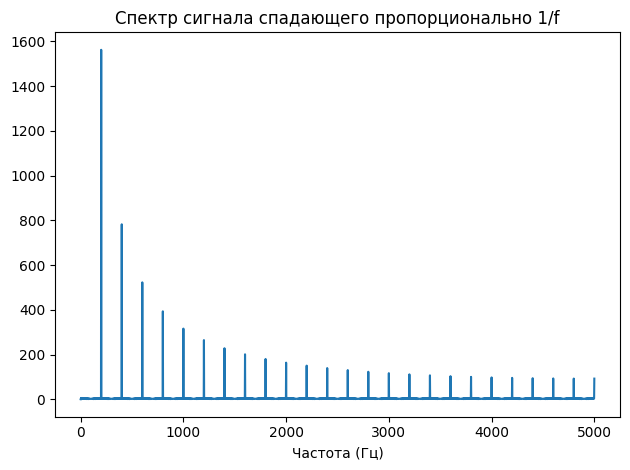

In [112]:
spec = wave.make_spectrum()
spec.plot()
tk.decorate(
    title="Спектр сигнала спадающего пропорционально 1/f",
    xlabel="Частота (Гц)"
)

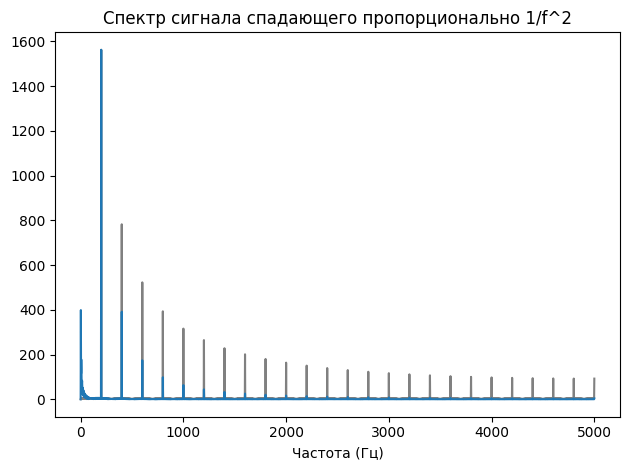

In [113]:
spec.plot(color='gray')
spec2 = divide_by_freq(spec)
spec2.scale(200)
spec2.plot()
tk.decorate(
    title="Спектр сигнала спадающего пропорционально 1/f^2",
    xlabel="Частота (Гц)"
)

In [114]:
wave = spec2.make_wave()
wave.make_audio()

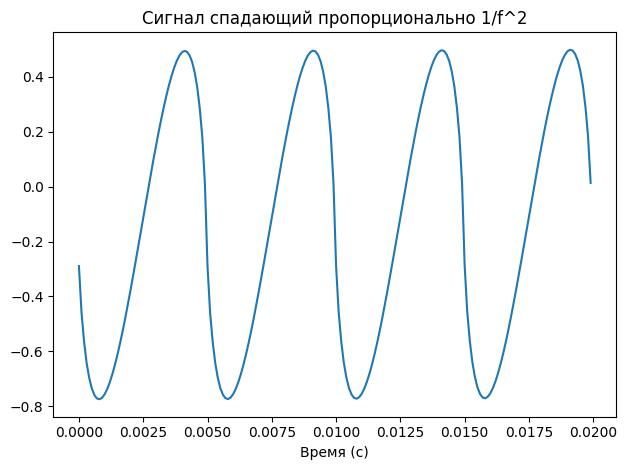

In [115]:
wave.segment(duration=0.02).plot()
tk.decorate(
    title="Сигнал спадающий пропорционально 1/f^2",
    xlabel="Время (с)"
)